# Table of Contents

Q6. Create an appropriate visualization to show the distribution of profiles

Q7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

Q8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important

# 01. Importing Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [2]:
# Project folder pathway

path = r'C:\Users\SD.DESKTOP-45BHU58\OneDrive\Desktop\CF\Section 4 - Python\Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\SD.DESKTOP-45BHU58\\OneDrive\\Desktop\\CF\\Section 4 - Python\\Instacart Basket Analysis'

In [4]:
# Importing most updated merged data set

ords_prods_custs_merged_2 = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','ords_prods_custs_merged_2.csv'))

In [5]:
# Checking shape

ords_prods_custs_merged_2.shape

(32404859, 40)

In [6]:
# Checking headers

ords_prods_custs_merged_2.head(1)

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,...,number_of_dependants,fam_status,income,region,activity_flag,generation,income_group,parent_status,weekday,department_name
0,0,2539329,1,1,2,8,NaN,True,196,1,...,3,married,40423,South,Normal activity,Millennials 26-41,Lower-middle class 32K-53K,Parent,Monday,Beverages


In [7]:
# Removing extra column 'Unnamed:0'

ords_prods_custs_merged_3 = ords_prods_custs_merged_2.drop(columns = ['Unnamed: 0'])

In [8]:
# Double checking headers

ords_prods_custs_merged_3.head(1)

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,number_of_dependants,fam_status,income,region,activity_flag,generation,income_group,parent_status,weekday,department_name
0,2539329,1,1,2,8,NaN,True,196,1,0,...,3,married,40423,South,Normal activity,Millennials 26-41,Lower-middle class 32K-53K,Parent,Monday,Beverages


### Create an appropriate visualization to show the distribution of profiles

# Key Question 1: What are the busiest days of the week and hours of the day?

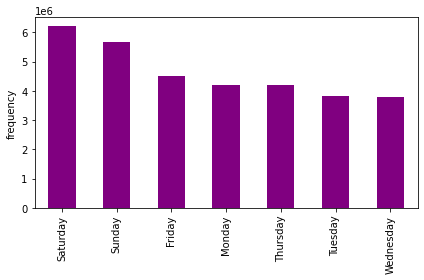

In [9]:
# Creating a bar chart for 'weekday' value counts

bar = ords_prods_custs_merged_3['weekday'].value_counts().plot.bar(color = 'purple')
plt.ylabel('frequency')
plt.tight_layout()

In [10]:
# Exporting bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'weekday_order_freq.png'))

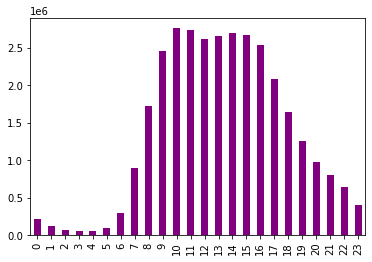

In [11]:
# Creating histogram for 'order_hour_of_day'

bar_2 = ords_prods_custs_merged_3['order_hour_of_day'].value_counts().sort_index().plot.bar(color = 'purple')

In [12]:
# Exporting bar_2

bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_freq.png'))

In [13]:
# Calculating mean price per day

price_per_day = ords_prods_custs_merged_3.groupby('weekday').agg({'prices': ['mean']})

Text(0, 0.5, 'mean_price')

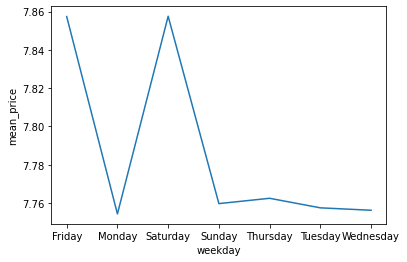

In [14]:
mean_price_per_day = sns.lineplot(data = price_per_day, legend = False)
plt.ylabel('mean_price')

In [15]:
# Exporting price_per_day line graph

mean_price_per_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'mean_price_per_day.png'))

# Key Question 2: Are there particular times of the day people spend the most money?

In [16]:
# Calculating mean price per hour

price_per_hour = ords_prods_custs_merged_3.groupby('order_hour_of_day').agg({'prices': ['mean']})

Text(0, 0.5, 'mean_price')

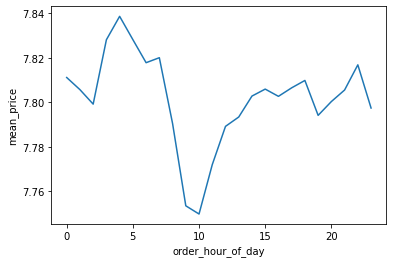

In [17]:
# Creating a line chart for mean price per hour

mean_price_per_hour = sns.lineplot(data = price_per_hour, legend = False)
plt.ylabel('mean_price')

In [18]:
# Exporting mean_price_per_hour line graph

mean_price_per_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'mean_price_per_hour.png'))

# Key Question 3: Is there a way to use simpler price range groupings to help marketing and sales with their efforts?

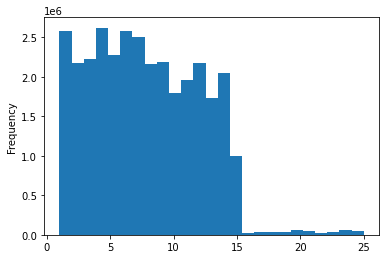

In [19]:
hist = ords_prods_custs_merged_3['prices'].plot.hist(bins = 25)

In [20]:
# Exporting histogram

hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_histogram.png'))

Text(0, 0.5, '')

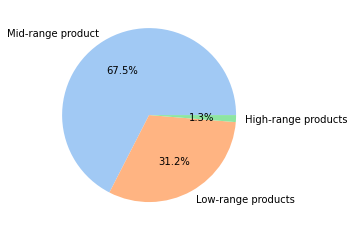

In [21]:
# Showing pie chart of prince range categories

pie = ords_prods_custs_merged_3['price_range_loc'].value_counts().plot.pie(autopct = '%1.1f%%', colors = sns.color_palette('pastel',3))
plt.ylabel('')

In [22]:
# Exporting pie chart

pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_pie.png'))

In [23]:
# Sales by price_range assigned to variable

price_range_sum = ords_prods_custs_merged_3.groupby('price_range_loc').agg({'prices' : ['sum']})

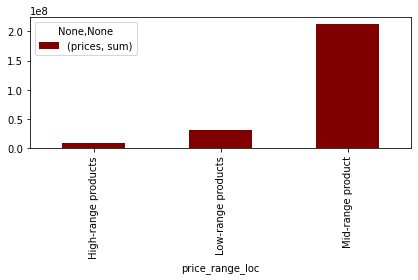

In [24]:
bar_price_range_sum = price_range_sum.plot.bar(color = 'maroon')
plt.tight_layout()

In [25]:
# Exporting bar_price_range_sum

bar_price_range_sum.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'sales_by_price_range.png'))

# Key Question 4a:  Are there certain types of products more popular than others?

In [26]:
# Total sales by product name

sales_by_product_name = ords_prods_custs_merged_3.groupby('product_name').agg({'prices' : ['min', 'max', 'sum']})

In [27]:
# Excel view

sales_by_product_name.to_clipboard()

In [28]:
# Creating list with top 10 best selling products

top_10_products = ['Banana', 'Bag of Organic Bananas', 'Large Lemon', 'Limes', 'Organic Baby Spinach', 'Organic Strawberries', 'Organic Whole Milk', 'Cucumber Kirby', 'Apple Honeycrisp Organic', 'Organic Cucumber']

In [29]:
# Writing loop to create a flag for top 10 best selling products

top_10 = []

for value in ords_prods_custs_merged_3['product_name']:
    if value in top_10_products:
        top_10.append('Top 10 selling product')
    else:
        top_10.append('Not applicable')

In [34]:
# Checking top_10 list results

top_10

['Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Top 10 selling product',
 'Top 10 selling product',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicabl

In [35]:
# Creating new column in df for 'best_seller'

ords_prods_custs_merged_3['best_seller'] = top_10

In [36]:
# Value counts for new column

ords_prods_custs_merged_3['best_seller'].value_counts(dropna = False)

Not applicable            30352324
Top 10 selling product     2052535
Name: best_seller, dtype: int64

In [37]:
# Creating new df with just the top 10 selling products

df_top_10_products = ords_prods_custs_merged_3[ords_prods_custs_merged_3['best_seller'] == 'Top 10 selling product']

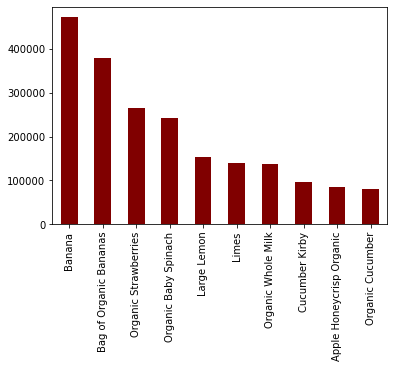

In [38]:
# Creating bar chart for top 10 selling products

bar_3 = df_top_10_products['product_name'].value_counts().plot.bar(color = 'maroon')

In [39]:
# Exporting bar_3

bar_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top_10_selling_prods.png'))

# Key Question 4b: Which departments have the highest frequency of product orders?

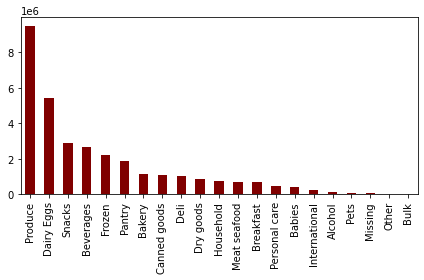

In [43]:
# Creating bar chart to visualizing order frequency by department

bar_4 = ords_prods_custs_merged_3['department_name'].value_counts().plot.bar(color = 'maroon')
plt.tight_layout()

In [44]:
# Exporting bar_4

bar_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ord_freq_by_dept.png'))

# Key Question 5a: What's the distribution among users in regard to their brand loyalty (i.e., how often do they return to Instacart?)

In [45]:
# Double checking headers

pd.set_option('display.max_columns', None)
ords_prods_custs_merged_3.head(1)

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_cost_by_cust,spender_flag,order_frequency_by_cust,frequency_flag,gender,state,age,date_joined,number_of_dependants,fam_status,income,region,activity_flag,generation,income_group,parent_status,weekday,department_name,best_seller
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,Millennials 26-41,Lower-middle class 32K-53K,Parent,Monday,Beverages,Not applicable


Text(0, 0.5, '')

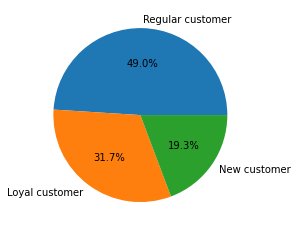

In [46]:
# Showing pie chart of customers based on loyalty status

pie_2 = ords_prods_custs_merged_3['loyalty_flag'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.ylabel('')

In [47]:
# Double checking value counts of 'loyalty_flag'

ords_prods_custs_merged_3['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

In [48]:
# Exporting pie_2

pie_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_pie.png'))

# Key Question 5b: Are there differences in ordering habits based on a customer’s loyalty status?

In [49]:
# Creating crosstab of 'frequency_flag' and 'loyalty_flag'

loyalty_and_spending_flags = pd.crosstab(ords_prods_custs_merged_3['frequency_flag'], ords_prods_custs_merged_3['loyalty_flag'], dropna = False)

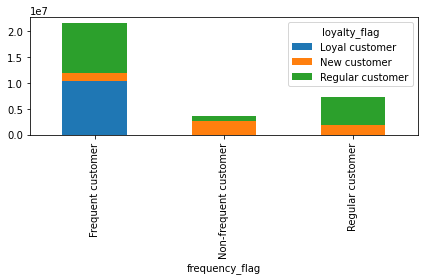

In [50]:
# Creating stacked bar chart - frequency_flag counts grouped by loyalty_flag

bar_5 = loyalty_and_spending_flags.plot(kind = 'bar', stacked = True)
plt.tight_layout()

In [51]:
# Exporting bar_5

bar_5.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_freq_flags.png'))

In [52]:
# Creating crosstab between 'department_name' and 'loyalty_flag'

dept_name_loyalty_flag = pd.crosstab(ords_prods_custs_merged_3['department_name'], ords_prods_custs_merged_3['loyalty_flag'], dropna = False)

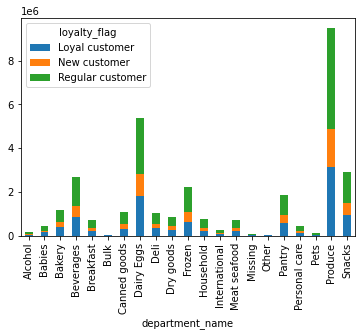

In [53]:
# Creating stacked bar chart - department_name counts by loyalty_flag

bar_6 = dept_name_loyalty_flag.plot(kind = 'bar', stacked = True)

In [134]:
# Checking results in Excel

dept_name_loyalty_flag.to_clipboard()

In [54]:
# Exporting bar_6

bar_6.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_name_loyalty_flag.png'))

### Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important

# Key Question 5c: Are there differences in ordering habits based on a customer’s region? 

In [43]:
# Creating crosstab between 'department_name' and 'region' - index argument gives data proportions

dept_name_region = pd.crosstab(ords_prods_custs_merged_3['department_name'], ords_prods_custs_merged_3['region'], normalize='index')

In [44]:
# Checking crosstab results

dept_name_region

region,Midwest,Northeast,South,West
department_name,,,,
Alcohol,0.199114,0.172692,0.335884,0.292311
Babies,0.195329,0.177297,0.338965,0.288408
Bakery,0.194832,0.177921,0.331632,0.295615
Beverages,0.193804,0.179835,0.334412,0.291949
Breakfast,0.193716,0.175773,0.333201,0.297310
Bulk,0.197987,0.167819,0.333584,0.300610
Canned goods,0.195368,0.174855,0.333329,0.296448
Dairy Eggs,0.194982,0.176712,0.332849,0.295456
Deli,0.193888,0.177710,0.332385,0.296017


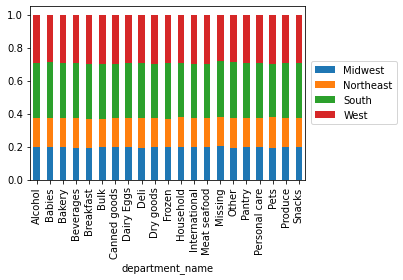

In [45]:
# Creating 100% stacked bar - department names by region

bar100 = dept_name_region.plot(kind='bar', stacked = True)
plt.legend(loc='right', bbox_to_anchor=(1.35, 0.50))
plt.tight_layout()

In [46]:
# Exporting bar100

bar100.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_region.png'))

In [47]:
# Creating crosstab between 'department_name' and 'region' - index argument gives data proportions

weekday_region = pd.crosstab(ords_prods_custs_merged_3['weekday'], ords_prods_custs_merged_3['region'], dropna = False)

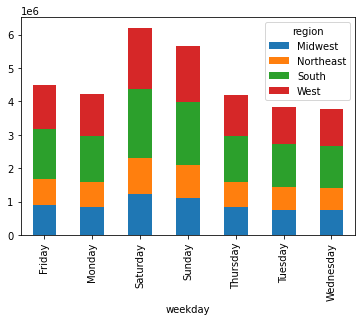

In [48]:
# Creating stacked bar - weekday by region

weekday_region_bar = weekday_region.plot(kind = 'bar', stacked = True)

In [49]:
# Exporting weekday_region_bar

weekday_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'weekday_region_bar.png'))

# Key Question 5d: Is there a connection between age and family status in terms of ordering habits?

In [59]:
# Creating crosstab between 'department_name' and 'generation'

order_by_age = pd.crosstab(ords_prods_custs_merged_3['department_name'], ords_prods_custs_merged_3['generation'])

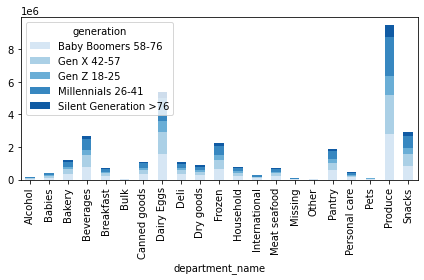

In [60]:
# Creating stacked bar - department_name by generation

bar_7 = order_by_age.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 5))
plt.legend
plt.tight_layout()

In [61]:
# Exporting bar7

bar_7.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_age_stack.png'))

In [62]:
# Creating same crosstab but with values as proportions

order_by_age_2 = pd.crosstab(ords_prods_custs_merged_3['department_name'], ords_prods_custs_merged_3['generation'], normalize = 'index')

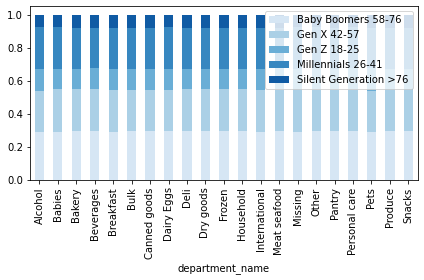

In [63]:
# Creating 100% stacked bar - department name by generation

bar100_2 = order_by_age_2.plot(kind='bar', stacked = True, color = sns.color_palette('Blues', 5))
plt.legend(loc='right', bbox_to_anchor=(1.0, 0.75))
plt.tight_layout()

In [64]:
# Exporting bar100_2

bar100_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_age_100stack.png'))

In [65]:
# Creating crosstab between 'department_name' and 'fam_status'

order_by_fam = pd.crosstab(ords_prods_custs_merged_3['department_name'], ords_prods_custs_merged_3['fam_status'])

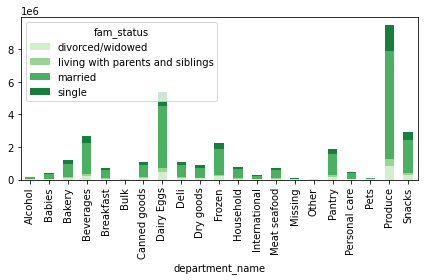

In [66]:
# Creating stacked bar - department_name by fam_status

bar_8 = order_by_fam.plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens', 4))
plt.legend
plt.tight_layout()

In [67]:
# Exporting bar_8

bar_8.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_fam_status.png'))

In [68]:
# Creating same tab but with values as proportions

order_by_fam_2 = pd.crosstab(ords_prods_custs_merged_3['department_name'], ords_prods_custs_merged_3['fam_status'], normalize = 'index')

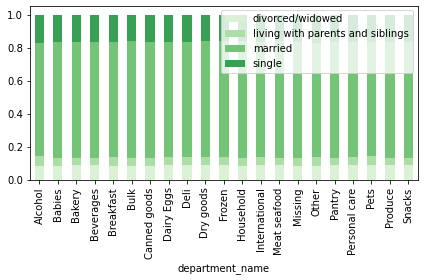

In [69]:
# Creating 100% stacked bar - department_name by fam_status

bar100_3 = order_by_fam_2.plot(kind='bar', stacked = True, color = sns.color_palette('Greens', 5))
plt.legend(loc='right', bbox_to_anchor=(1.0, 0.80))
plt.tight_layout()

In [70]:
# Exporting bar100_3

bar100_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_fam_status_stacked.png'))

### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [71]:
# Aggregations for generation & prices

age_price_agg = ords_prods_custs_merged_3.groupby('generation').agg({'prices' : ['min', 'mean', 'max']})

In [72]:
age_price_agg

prices                
                         min      mean   max
generation                                  
Baby Boomers 58-76       1.0  7.796990  25.0
Gen X 42-57              1.0  7.790789  25.0
Gen Z 18-25              1.0  7.785748  25.0
Millennials 26-41        1.0  7.787246  25.0
Silent Generation >76    1.0  7.789497  25.0

In [73]:
# Aggregations for generation & order_number

age_order_agg = ords_prods_custs_merged_3.groupby('generation').agg({'order_number' : ['min', 'mean', 'max']})

In [74]:
age_order_agg

order_number               
                               min       mean max
generation                                       
Baby Boomers 58-76               1  17.122193  99
Gen X 42-57                      1  17.158065  99
Gen Z 18-25                      1  17.173224  99
Millennials 26-41                1  17.144745  99
Silent Generation >76            1  17.110013  99

In [75]:
# Aggregations for income & price

income_price_agg = ords_prods_custs_merged_3.groupby('income_group').agg({'prices' : ['min', 'mean', 'max']})

In [76]:
income_price_agg

prices                
                                min      mean   max
income_group                                       
Lower class <32K                1.0  6.498681  25.0
Lower-middle class 32K-53K      1.0  6.843750  25.0
Middle class 53K-107K           1.0  7.920133  25.0
Upper class >374K               1.0  7.755069  25.0
Upper middle class 107K-374K    1.0  7.958679  25.0

In [77]:
# Aggregations for income & order_number

income_order_agg = ords_prods_custs_merged_3.groupby('income_group').agg({'order_number' : ['min', 'mean', 'max']})

In [78]:
income_order_agg

order_number               
                                      min       mean max
income_group                                            
Lower class <32K                        1  15.473165  99
Lower-middle class 32K-53K              1  16.073580  99
Middle class 53K-107K                   1  17.286154  99
Upper class >374K                       1  18.913610  99
Upper middle class 107K-374K            1  17.333854  99

In [79]:
# Aggregations for fam_status & price

fam_price_agg = ords_prods_custs_merged_3.groupby('fam_status').agg({'prices' : ['min', 'mean', 'max']})

In [80]:
fam_price_agg

prices                
                                    min      mean   max
fam_status                                             
divorced/widowed                    1.0  7.800975  25.0
living with parents and siblings    1.0  7.800712  25.0
married                             1.0  7.790695  25.0
single                              1.0  7.784249  25.0

In [81]:
# Aggregations for fam_status & order_number

fam_order_agg = ords_prods_custs_merged_3.groupby('fam_status').agg({'order_number' : ['min', 'mean', 'max']})

In [82]:
fam_order_agg

order_number               
                                          min       mean max
fam_status                                                  
divorced/widowed                            1  17.275873  99
living with parents and siblings            1  17.296372  99
married                                     1  17.088283  99
single                                      1  17.258766  99

In [83]:
# Aggregations for parent_status & prices

parent_price_agg = ords_prods_custs_merged_3.groupby('parent_status').agg({'prices' : ['min', 'mean', 'max']})

In [84]:
parent_price_agg

prices                
                 min      mean   max
parent_status                       
Non-parent       1.0  7.789975  25.0
Parent           1.0  7.791334  25.0

In [85]:
# Aggregations for parent_status & order_number

parent_order_agg = ords_prods_custs_merged_3.groupby('parent_status').agg({'order_number' : ['min', 'mean', 'max']})

In [86]:
parent_order_agg

order_number               
                       min       mean max
parent_status                            
Non-parent               1  17.264622  99
Parent                   1  17.101557  99

# Question 5e: What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status? 

Text(0, 0.5, '')

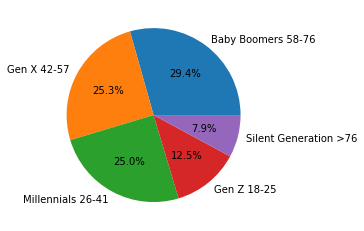

In [87]:
# Showing pie chart of customers based on generation

pie_3 = ords_prods_custs_merged_3['generation'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.ylabel('')

In [88]:
# Exporting pie_3

pie_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'custs_generation_pie.png'))

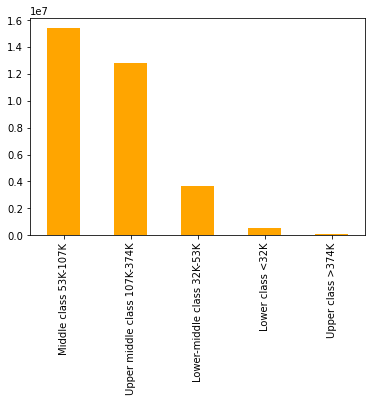

In [89]:
# Bar chart of income_group count

bar_9 = ords_prods_custs_merged_3['income_group'].value_counts().plot.bar(color = 'orange')

In [94]:
# Exporting bar_9

bar_9.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'count_by_income_group_bar.png'))

In [91]:
# Creating aggregation for total sales by income_group

sales_by_income_group = ords_prods_custs_merged_3.groupby('income_group').agg({'prices' : ['sum']})

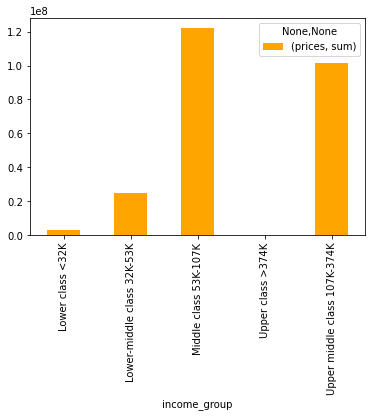

In [93]:
# Bar chart of total sales by income group

income_price_bar = sales_by_income_group.plot.bar(color = 'orange')

In [95]:
# Exporting income_price_bar

income_price_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'sales_by_income_group.png'))

Text(0, 0.5, '')

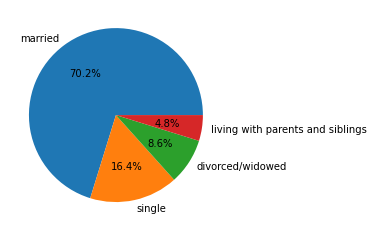

In [96]:
# Showing pie chart of customers based on fam_status

pie_4 = ords_prods_custs_merged_3['fam_status'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.ylabel('')

In [97]:
# Exporting pie_4

pie_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'count_by_fam_status_pie.png'))

In [98]:
# Creating aggregation for total sales by fam_status

sales_by_fam_status = ords_prods_custs_merged_3.groupby('fam_status').agg({'prices' : ['sum']})

<function matplotlib.pyplot.legend(*args, **kwargs)>

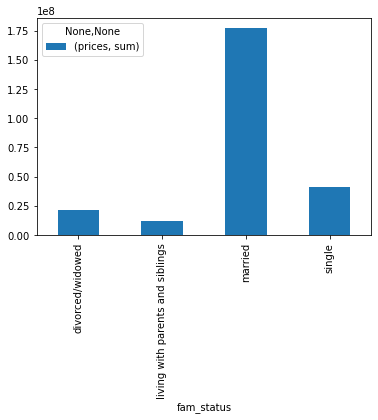

In [99]:
# Bar chart of total sales by fam_status

bar_10 = sales_by_fam_status.plot.bar()
plt.legend

In [100]:
# Exporting bar_10

bar_10.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'sales_by_fam_status_bar.png'))

# Key Question 5f: What differences can you find in ordering habits of different customer profiles? 

In [101]:
# Crosstab between order_hour_of_day and parent_status

parent_spender = pd.crosstab(ords_prods_custs_merged_3['order_hour_of_day'], ords_prods_custs_merged_3['parent_status'], dropna = False)

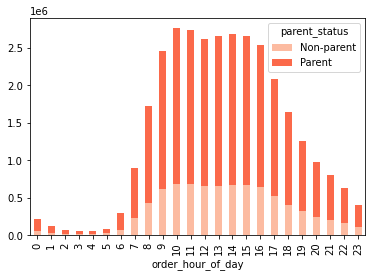

In [102]:
# Creating stacked bar chart - order_hour_of_day by parent_status

bar_11 = parent_spender.plot(kind = 'bar', stacked = True, color = sns.color_palette('Reds', 3))

In [103]:
# Exporting bar_11

bar_11.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_by_parent_status.png'))

In [104]:
# Crosstab between generation and spender_flag

age_spender_type = pd.crosstab(ords_prods_custs_merged_3['generation'], ords_prods_custs_merged_3['spender_flag'], dropna = False)

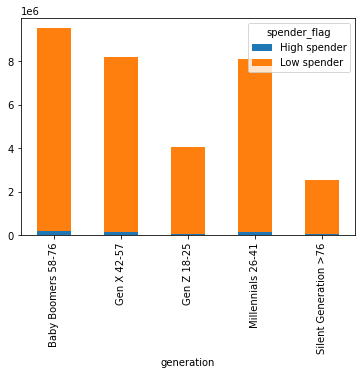

In [105]:
# Creating stacked bar chart - generation count by spender_flag

bar_12 = age_spender_type.plot(kind = 'bar', stacked = True)

In [106]:
# Exporting bar_12

bar_12.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'generation_count_by_spender_flag.png'))

In [110]:
# Creating crosstab between weekday and parent_status

parent_spender_2 = pd.crosstab(ords_prods_custs_merged_3['weekday'], ords_prods_custs_merged_3['parent_status'], dropna = False)

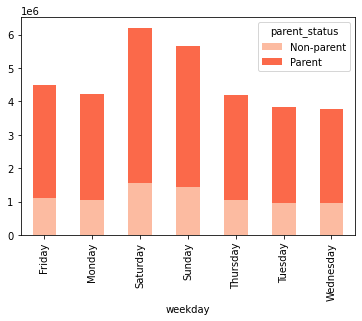

In [111]:
# Creating stacked bar - weekday by parent_status

bar_13 = parent_spender_2.plot(kind = 'bar', stacked = True, color = sns.color_palette('Reds',3))

In [113]:
# Exporting bar13

bar_13.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'weekday_by_parent_status.png'))

In [135]:
# Creating crosstab between weekday and generation

age_spend_habit = pd.crosstab(ords_prods_custs_merged_3['weekday'], ords_prods_custs_merged_3['generation'], dropna = False)

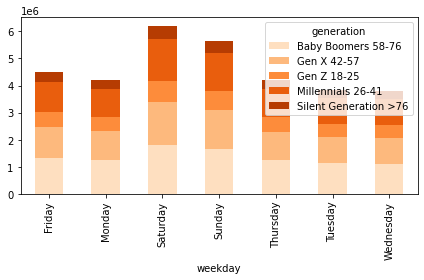

In [161]:
# Creating stacked bar - weekday by generation

bar_14 = age_spend_habit.plot(kind = 'bar', stacked = True, color = sns.color_palette('Oranges',5))
plt.tight_layout()

In [162]:
# Exporting bar14

bar_14.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_spend_habit.png'))

In [151]:
# Creating crosstab between generation and fam_status

gen_fam = pd.crosstab(ords_prods_custs_merged_3['generation'], ords_prods_custs_merged_3['fam_status'], dropna = False)

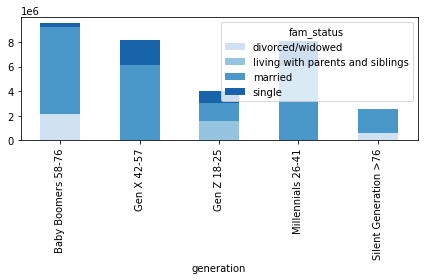

In [167]:
# Creating stacked bar - generation by fam_status

bar_15 = gen_fam.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues',4))
plt.tight_layout()

In [168]:
# Exporting bar_15

bar_15.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'gen_fam_status.png'))

In [50]:
# Double checking headers

ords_prods_custs_merged_3.head(1)

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,fam_status,income,region,activity_flag,generation,income_group,parent_status,weekday,department_name,best_seller
0,2539329,1,1,2,8,NaN,True,196,1,0,...,married,40423,South,Normal activity,Millennials 26-41,Lower-middle class 32K-53K,Parent,Monday,Beverages,Not applicable


In [51]:
# Checking shape

ords_prods_custs_merged_3.shape

(32404859, 40)

# Exporting Data

In [52]:
# Exporting most updated df as .csv file

ords_prods_custs_merged_3.to_csv(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_custs_merged_final.csv'))